In [2]:
# import das bibliotecas usadas no projeto

import numpy as np
import seaborn as sns
from math import sqrt

In [38]:
# criação da função lanca_dados
def lanca_dados() -> int:
    '''
    Função para simular o lançamento de dois dados e retornar a soma das duas faces
    
    Parametros: Nenhum
    
    Retorno: inteiro com a soma dos resultados dos dados'''
    
    dados = np.random.randint(1, 7, size = (1, 2)) # vetor simulando o lançamento dos dois dados

    soma_faces = np.sum(dados)

    return soma_faces

# criacao da funcao para determinar o tamanho da amostra

def amostragem(populacao, **parametros) -> int:
    '''
    Função para o cálculo de uma amostra simples
    
    Parametros: 
        populacao: quantidade de lançamentos feitos
        z: definido a partir do grau de confiança desejado
        p = proporção
        e = margem de erro
    
    Retornos:
        amostra: inteiro representando o tamanho da amostra'''
    
    valor_z = parametros['z']
    valor_p = parametros['p']
    valor_e = parametros['e']
    
    amostra = round(populacao * (valor_z ** 2) * (valor_p * (1 - valor_p)) / (((1000 - 1) * (valor_e ** 2)) + ((valor_z ** 2) * (valor_p * (1 - valor_p)))))
    
    return amostra


In [39]:
#armazenando os resultados de 1000 lancamentos num vetor

N = 1000 # tamanho da população 
arr_resultados = np.array([lanca_dados() for i in range(N)])

# Calculando os resultados

media = round(np.mean(arr_resultados), 2)

maximo = np.max(arr_resultados)

minimo = np.min(arr_resultados)

dvp = np.std(arr_resultados)

print(f'''
A média dos resultados é: {media}
\nO lançamento máximo foi: {maximo}
\nO lançamento minimo foi {minimo}''')

print('\n\nA frequencia de cada resultado é:\n')

# contagem das frequencias de cada resultado

for resultado in range(2, 13):
    freq = np.count_nonzero(arr_resultados == resultado) # conta a ocorrencia de cada possível resultado
    
    print(f'Soma igual à {resultado:2d}: {freq} --> {round(freq/len(arr_resultados) * 100, 2)}% do total de jogos')


A média dos resultados é: 7.2

O lançamento máximo foi: 12

O lançamento minimo foi 2


A frequencia de cada resultado é:

Soma igual à  2: 25 --> 2.5% do total de jogos
Soma igual à  3: 50 --> 5.0% do total de jogos
Soma igual à  4: 70 --> 7.0% do total de jogos
Soma igual à  5: 100 --> 10.0% do total de jogos
Soma igual à  6: 132 --> 13.2% do total de jogos
Soma igual à  7: 161 --> 16.1% do total de jogos
Soma igual à  8: 167 --> 16.7% do total de jogos
Soma igual à  9: 116 --> 11.6% do total de jogos
Soma igual à 10: 85 --> 8.5% do total de jogos
Soma igual à 11: 59 --> 5.9% do total de jogos
Soma igual à 12: 35 --> 3.5% do total de jogos


In [40]:
# normalizando a distribuicao
arr_resultados_normalizado = (arr_resultados - media) / dvp

C:\Users\vinic\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


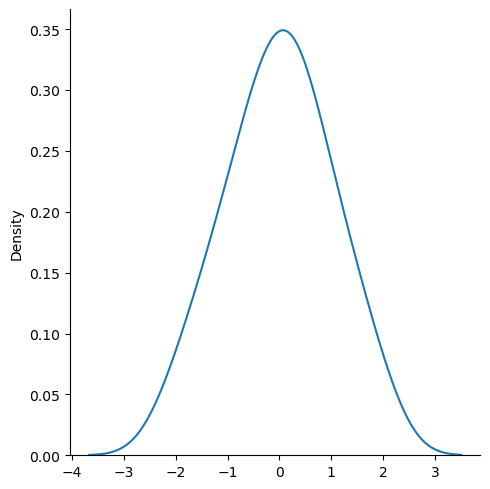

In [41]:
# plotando a distribuicao normal padrão do conjunto de dados
distribuicao = sns.displot(arr_resultados_normalizado, kind="kde", bw_adjust=2)

# Fórmula para definição do tamanho da amostra

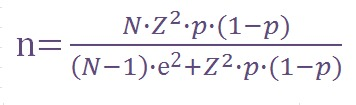

# Fórmula para determinar a estatística de teste

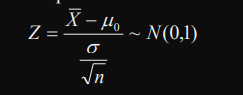

In [59]:
# teste de hipotese

#Hipotese nula H0: Distribuicao é normal com média u = 7
# Hipotese alternativa: H1: Distribuicao u <> 7

# Adotando um intervalo de confianca de 95% e definindo o tamanho da amostra n

n = amostragem(N, z = 1.96, p = 0.5, e = 0.05)

arr_amostra = np.random.choice(arr_resultados, size = n) # vetor de amostras aleatorias para fazermos o teste de hipotese

media_amostral = round(np.mean(arr_amostra), 2)

dvp_amostral = np.std(arr_amostra)

valor_teste = round((media_amostral - media) / (dvp_amostral / sqrt(tam_amostra)), 2)

print(f'Para uma amostra de {n} lançamentos, tem-se uma media amostral de {media_amostral}.\n')

if -1.96 <= valor_teste <= 1.96:
    print(
f''' 
A Estátistica de teste é {valor_teste}, que fica dentro do intervalo de confiança de 95%. Logo, não podemos rejeitar
a hipótese nula à um nível de significância de 5% e portanto a média da soma das faces fica próximo de 7.
Conclui-se que o jogo não é justo, pois os lançamentos dos dois dados não geram resultados igualmente prováveis.
Para o jogador de dados, isto significa que quanto mais próximo a soma das faces estiver de 7, maior as probabilidades
delas ocorrerem.''')

else:
    print(
f'''
A Estatistica de teste é {valor_teste}, que fica fora do intervalo de confiança de 95% e portanto a hipótese alternativa
não pode ser rejeitada à um nível de significância de 5%''')

Para uma amostra de 278 lançamentos, tem-se uma media amostral de 7.13.

 
A Estátistica de teste é -0.49, que fica dentro do intervalo de confiança de 95%. Logo, não podemos rejeitar
a hipótese nula à um nível de significância de 5% e portanto a média da soma das faces fica próximo de 7.
Conclui-se que o jogo não é justo, pois os lançamentos dos dois dados não geram resultados igualmente prováveis.
Para o jogador de dados, isto significa que quanto mais próximo a soma das faces estiver de 7, maior as probabilidades
delas ocorrerem.
